#MarkDown


#Neccesary Imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [40]:
# Paths to your datasets
data_train_path = 'Train'
data_test_path = 'Test'
data_val_path = 'Validation'

In [41]:
# Image dimensions
img_width = 180
img_height = 180

In [42]:
# Load datasets
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False
)
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32
)


Found 25 files belonging to 2 classes.
Found 6 files belonging to 2 classes.
Found 9 files belonging to 2 classes.


In [43]:
# Class names (should be CU and non-CU)
data_Cu = data_train.class_names


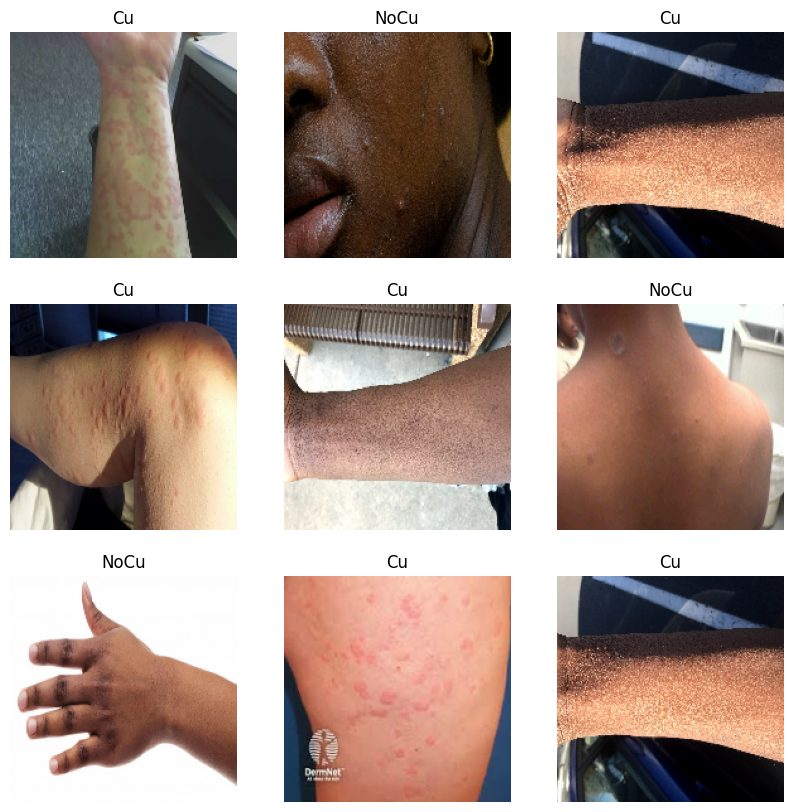

In [44]:
# Display some training images
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_Cu[labels[i]])
        plt.axis('off')


In [45]:
from tensorflow.keras import layers, Sequential

# Define the model with Input layer
model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Specify input shape here
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


In [46]:
# Compile the model with binary crossentropy loss
model.compile(optimizer='adam', 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [47]:
# Train the model
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2000 - loss: 0.7517 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.7600 - loss: 1.0748 - val_accuracy: 1.0000 - val_loss: 0.0698
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.7600 - loss: 0.6198 - val_accuracy: 1.0000 - val_loss: 0.2980
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.7600 - loss: 0.4981 - val_accuracy: 1.0000 - val_loss: 0.4341
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.7600 - loss: 0.5310 - val_accuracy: 1.0000 - val_loss: 0.4470
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.7600 - loss: 0.5282 - val_accuracy: 1.0000 - val_loss: 0.3674
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.7600 - loss: 0.4828 - val_accuracy: 1.0000 - val_loss: 0.2237
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.7600 - loss: 0.4448 - val_accuracy: 1.0000 - val_loss: 0.

In [48]:
# Plot training & validation accuracy/loss
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

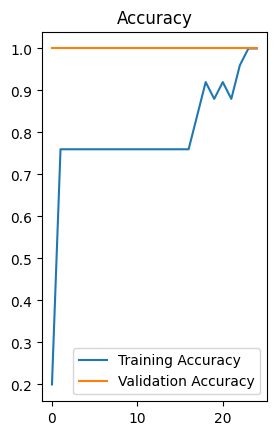

In [49]:
# First subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()


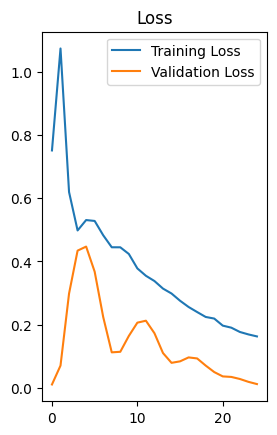

In [50]:
# Second subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [51]:
# Test the model on a single image
image_path = 'cu1.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)  # Add batch dimension

In [52]:
# Test the model on a single image
image_path = 'noncu2.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)  # Add batch dimension

# Make the prediction
predict = model.predict(img_bat)
score = tf.nn.sigmoid(predict)  # Use sigmoid to get probability

# Determine whether the image is CU or non-CU based on the threshold
threshold = 0.5
prediction = (score > threshold).numpy().astype(int)[0][0]
disease_status = "CU" if prediction == 1 else "non-CU"
confidence = score.numpy()[0][0] * 100  # Calculate the confidence as a percentage



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [55]:
print('Disease in image is {} with confidence of {:.2f}%'.format(disease_status, confidence))


Disease in image is CU with confidence of 50.01%


In [54]:
# Save the model
model.save('Image_classify_binary.keras') 